In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [3]:
with open('데이터셋/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) #한줄 건너 뛰기
    
    rows = []
    for row in csvreader:
        rows.append(row)
        

In [4]:
input_cnt, output_cnt = 10, 1
data = np.zeros([len(rows), input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [5]:
for n, row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n, 3:] = row[1:]

In [6]:
train_ratio = 0.8
test_begin_idx = int(data.shape[0]* train_ratio)
print("test_begin_idx: ", test_begin_idx)

test_begin_idx:  3341


In [7]:
np.arange(data.shape[0])

array([   0,    1,    2, ..., 4174, 4175, 4176])

In [8]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)

In [9]:
shuffle_map[:5]

array([2374, 4043,  490, 2421, 1363])

In [10]:
shuffle_map[test_begin_idx:].shape

(836,)

In [11]:
test_data = data[shuffle_map[test_begin_idx:]] #픽셀 인덱스 추출
print(test_data.shape)
train_data = data[shuffle_map[:test_begin_idx]]
print(train_data.shape)

(836, 11)
(3341, 11)


In [12]:
train_X, train_Y = train_data[:, :-output_cnt], train_data[:,-output_cnt:]
test_X, test_Y = test_data[:, :-output_cnt], test_data[:,-output_cnt:]

In [13]:
print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(test_Y.shape)

(3341, 10)
(836, 10)
(3341, 1)
(836, 1)


In [14]:
train_x_mean = np.mean(train_X, axis=0)
train_x_std = train_X.std(axis = 0)

In [15]:
#질문 
train_X -= train_x_mean
train_X /= train_x_std

In [16]:
train_X

array([[-0.76234128, -0.67604968,  1.46187865, ..., -0.9270776 ,
        -1.04259496, -0.75024541],
       [-0.76234128,  1.47918123, -0.6840513 , ...,  0.18553551,
         0.24373554,  0.25689454],
       [ 1.31174847, -0.67604968, -0.6840513 , ...,  0.51211224,
         0.07893875,  0.32883311],
       ...,
       [ 1.31174847, -0.67604968, -0.6840513 , ...,  0.04364356,
         0.13844871,  0.36480239],
       [-0.76234128,  1.47918123, -0.6840513 , ...,  0.42202211,
        -0.01261502, -0.08121673],
       [-0.76234128, -0.67604968,  1.46187865, ..., -1.35725798,
        -1.31725628, -1.46963109]])

In [17]:
test_X -=train_x_mean
test_X /=train_x_std

In [18]:
test_X[:,0].shape

(836,)

In [19]:
df_test_X = pd.DataFrame(test_X)
df_test_X.describe()

,0,1,2,3,4,5,6,7,8,9
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,-0.018051,-0.008341,0.026981,-0.042365,-0.044951,-0.026481,-0.029826,-0.043744,-0.035876,-0.016494
std,0.995461,0.997207,1.010683,1.035355,1.031200,0.965190,1.012548,0.998400,1.017172,1.006894
min,-0.762341,-0.676050,-0.684051,-3.480948,-3.232903,-2.724520,-1.683964,-1.616267,-1.642272,-1.699835
25%,-0.762341,-0.676050,-0.684051,-0.671046,-0.646729,-0.706174,-0.821191,-0.844870,-0.864065,-0.796106
50%,-0.762341,-0.676050,-0.684051,0.125791,0.139265,0.006183,-0.107155,-0.153429,-0.147657,-0.066829
75%,1.311748,1.479181,1.461879,0.712935,0.722421,0.599814,0.644704,0.587000,0.687771,0.672340
max,1.311748,1.479181,1.461879,2.096916,2.192991,8.910651,3.421113,3.762114,3.374875,3.889792


In [20]:
import tensorflow as tf

GJ_NET_MODEL = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation = 'elu', input_shape =(10,)),
    tf.keras.layers.Dense(units=24, activation = 'elu'),
    tf.keras.layers.Dense(units=36 , activation = 'elu'),
    tf.keras.layers.Dense(units=1)
])

In [21]:
GJ_NET_MODEL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [22]:
GJ_NET_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss = 'mse')

In [23]:
history_1 = GJ_NET_MODEL.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split= 0.2, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')]) #validation_split(검증에대한 로스값 훈련데이터 0.2로만), callback 값튀는게 있다면 멈춰라

Epoch 1/25
84/84 [==============================] - 1s 2ms/step - loss: 9.9237 - val_loss: 6.1894
Epoch 2/25
84/84 [==============================] - 0s 757us/step - loss: 5.2966 - val_loss: 5.8361
Epoch 3/25
84/84 [==============================] - 0s 674us/step - loss: 5.1473 - val_loss: 5.5417
Epoch 4/25
84/84 [==============================] - 0s 627us/step - loss: 5.7674 - val_loss: 6.2615
Epoch 5/25
84/84 [==============================] - 0s 578us/step - loss: 5.4206 - val_loss: 5.4742
Epoch 6/25
84/84 [==============================] - 0s 725us/step - loss: 5.1294 - val_loss: 7.9320
Epoch 7/25
84/84 [==============================] - 0s 602us/step - loss: 5.1757 - val_loss: 6.0046
Epoch 8/25
84/84 [==============================] - 0s 674us/step - loss: 5.0290 - val_loss: 9.7073
Epoch 9/25
84/84 [==============================] - 0s 674us/step - loss: 6.6780 - val_loss: 5.5600
Epoch 10/25
84/84 [==============================] - 0s 674us/step - loss: 5.5735 - val_loss: 5.3501
E

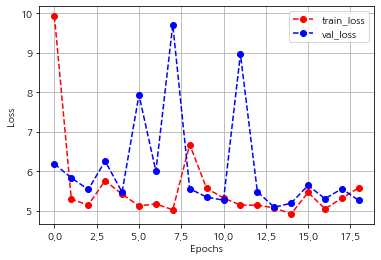

In [24]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '--o', color = 'blue', label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [25]:
GJ_NET_MODEL.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 614us/step - loss: 4.7199


4.719864368438721

In [26]:
pred_Y = GJ_NET_MODEL.predict(test_X)
print(pred_Y[:10])

[[14.711174 ]
 [14.711341 ]
 [10.418029 ]
 [11.683045 ]
 [12.248942 ]
 [ 6.677123 ]
 [11.301252 ]
 [ 5.8390856]
 [10.922939 ]
 [10.765513 ]]


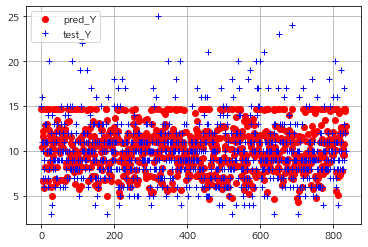

In [27]:
plt.plot(pred_Y[:], 'o', color ='red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.grid()
plt.legend()
plt.show()

In [28]:
###################################################은닉계층 다버리고 학습시켜보기##################################################

In [29]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape = (10,))
])

In [30]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss='mse')

In [31]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y, epochs=25, batch_size = 32)

Epoch 1/25
105/105 [==============================] - 0s 418us/step - loss: 53.8857
Epoch 2/25
105/105 [==============================] - 0s 307us/step - loss: 10.3960
Epoch 3/25
105/105 [==============================] - 0s 307us/step - loss: 5.3895
Epoch 4/25
105/105 [==============================] - 0s 307us/step - loss: 5.1107
Epoch 5/25
105/105 [==============================] - 0s 307us/step - loss: 5.1143
Epoch 6/25
105/105 [==============================] - 0s 307us/step - loss: 5.1251
Epoch 7/25
105/105 [==============================] - 0s 307us/step - loss: 5.0802
Epoch 8/25
105/105 [==============================] - 0s 307us/step - loss: 5.0870
Epoch 9/25
105/105 [==============================] - 0s 307us/step - loss: 5.0234
Epoch 10/25
105/105 [==============================] - 0s 384us/step - loss: 5.0967
Epoch 11/25
105/105 [==============================] - 0s 307us/step - loss: 5.0671
Epoch 12/25
105/105 [==============================] - 0s 347us/step - loss: 5.0858

In [33]:
GJ_NET_MODEL_V2.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 727us/step - loss: 4.5571


4.55712890625

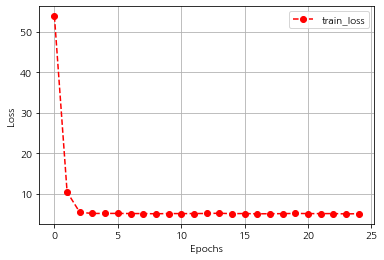

In [34]:
plt.plot(history_2.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [35]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[16.816284 ]
 [13.417703 ]
 [10.347684 ]
 [11.253138 ]
 [11.223349 ]
 [ 6.2198606]
 [10.419015 ]
 [ 5.5213566]
 [11.549007 ]
 [ 9.616653 ]]


In [36]:
print(test_Y[:10])

[[15.]
 [16.]
 [11.]
 [11.]
 [10.]
 [ 7.]
 [ 8.]
 [ 6.]
 [ 9.]
 [11.]]


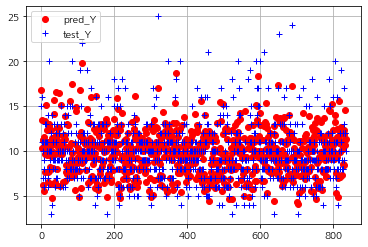

In [37]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')
plt.legend()
plt.grid()
plt.show()

In [38]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y)/test_Y))
print(f'GJ_NET_MODEL_V2 - ACC {acc:.2f}%')

GJ_NET_MODEL_V2 - ACC 0.84%


In [39]:
GJ_NET_MODEL_V2.save('my_model_2.h5')

In [41]:
GJ_NET_MODEL_V2_param = GJ_NET_MODEL_V2.get_weights()
print(GJ_NET_MODEL_V2_param)

[array([[ 0.27632457],
       [-0.11917903],
       [-0.43218163],
       [-0.14338097],
       [ 1.1933292 ],
       [ 0.31312743],
       [ 4.0222964 ],
       [-4.0315356 ],
       [-1.035772  ],
       [ 1.369693  ]], dtype=float32), array([9.916878], dtype=float32)]


In [42]:
print('weight: \n', GJ_NET_MODEL_V2_param[0])
print('bias: \n', GJ_NET_MODEL_V2_param[1])

weight: 
 [[ 0.27632457]
 [-0.11917903]
 [-0.43218163]
 [-0.14338097]
 [ 1.1933292 ]
 [ 0.31312743]
 [ 4.0222964 ]
 [-4.0315356 ]
 [-1.035772  ]
 [ 1.369693  ]]
bias: 
 [9.916878]
